In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

import sys
sys.path.append('C:/Users/jkahn/Documents/Schmidt/cfl')

from cfl.experiment import Experiment 

## Clustering aross a bunch of numbers of clusters 

save_path 'clustering' doesn't exist, creating now.
All results from this run will be saved to clustering\experiment0000
verbose specified but not used by this block type
Training CFL pipeline.


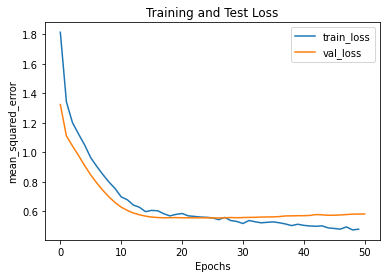

All results from this run will be saved to clustering\experiment0001
verbose specified but not used by this block type
Training CFL pipeline.


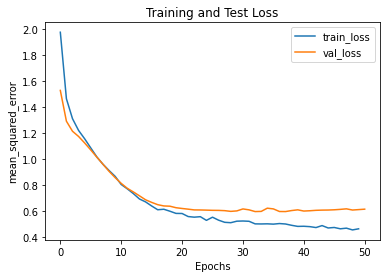

All results from this run will be saved to clustering\experiment0002
verbose specified but not used by this block type
Training CFL pipeline.


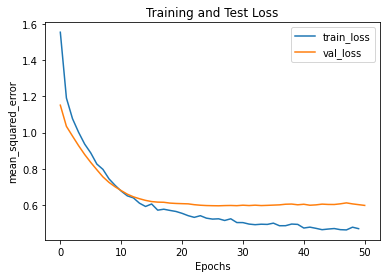

All results from this run will be saved to clustering\experiment0003
verbose specified but not used by this block type
Training CFL pipeline.


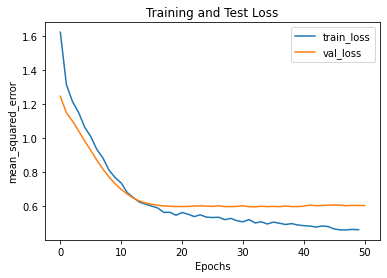

All results from this run will be saved to clustering\experiment0004
verbose specified but not used by this block type
Training CFL pipeline.


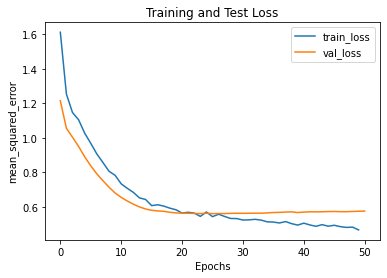

All results from this run will be saved to clustering\experiment0005
verbose specified but not used by this block type
Training CFL pipeline.


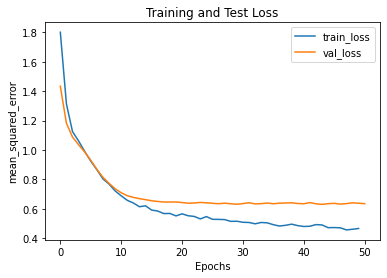

In [19]:
# the parameters should be passed in dictionary form
data_info = {'X_dims' : X.shape,
             'Y_dims' : Y.shape,
             'Y_type' : 'categorical' #options: 'categorical' or 'continuous'
            }

# pass in empty parameter dictionaries to use the default parameter values (not
# allowed for data_info)
cde_params = {  'dense_units' : [100, 20, data_info['Y_dims'][1]], # model creation parameters
                'activations' : ['relu', 'linear', 'linear'],
                'dropouts'    : [0.2, 0, 0],

                'batch_size'  : 32, # parameters for training
                'n_epochs'    : 50,
                'optimizer'   : 'adam',
                'opt_config'  : {},
                'loss'        : 'mean_squared_error',
                'best'        : True,

                'verbose'     : 0, # amount of output to print
                'show_plot'   : True,
            }


x_lbls_L = []
for n in range(2, 8): 
    cluster_params = {'x_model': KMeans(n_clusters=n), 'y_model': KMeans(n_clusters=5)}

    # steps of this CFL pipeline
    block_names = ['CondExpMod', 'Clusterer']
    block_params = [cde_params, cluster_params]

    # folder to save results to
    save_path = 'clustering'

    # create the experiment!
    my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, block_names=block_names, block_params=block_params, results_path=save_path)

    results = my_exp.train()
    x_lbls_L.append(results['Clusterer']['x_lbls'])

In [ ]:
np.save(x_lbls_L)

In [20]:
import plotly.graph_objects as go
from cfl.visualization_methods import clustering_to_sankey as sk

#x_lbls_L = list of x_lbls from several different rounds of clustering on the same data

link, label = sk.convert_lbls_to_sankey_nodes(x_lbls_L)
# plot
fig = go.Figure(data=
          [go.Sankey(node = dict(pad = 15, thickness=20, label = label, color =  "blue"),
                     link = link)])

fig.update_layout(title_text="Sample Sankey", font_size=10)
fig.show()
